#### Capstone-Project---The-Battle-of-Neighborhoods


Bangalore officially known as Bengaluru, is the capital and the largest city of the Indian state of Karnataka. It has a population of more than 
8 million and a metropolitan population of around 11 million, making it the third most populous city and fifth most populous urban agglomeration in India.
Located in southern India on the Deccan Plateau, at a height of over 900 m (3,000 ft) above sea level, Bangalore is known for its pleasant climate throughout the year. 
Its elevation is the highest among the major cities of India.

The city's history dates back to around 890 CE, in a stone inscription found at the Nageshwara Temple in Begur, Bangalore. The Begur inscription is written in Halegannada 
(ancient Kannada), mentions 'Bengaluru Kalaga' . It was a significant turning point in the history of Bangalore as it bears the earliest 
reference to the name 'Bengaluru'. In 1537 CE, Kempé Gowdā – a feudal ruler under the Vijayanagara Empire – established a mud fort considered to be the foundation of 
modern Bangalore and its oldest areas, or petes, which exist to the present day. After the fall of Vijayanagar empire in 16th century, the Mughals sold Bangalore to 
Chikkadevaraja Wodeyar (1673–1704), the then ruler of the Kingdom of Mysore for three lakh rupees.When Haider Ali seized control of the Kingdom of Mysore, 
the administration of Bangalore passed into his hands. It was captured by the British East India Company after victory in the Fourth Anglo-Mysore War (1799), who returned 
administrative control of the city to the Maharaja of Mysore. The old city developed in the dominions of the Maharaja of Mysore and was made capital of the Princely 
State of Mysore, which existed as a nominally sovereign entity of the British Raj. In 1809, the British shifted their cantonment to Bangalore, outside the old city, 
and a town grew up around it, which was governed as part of British India. Following India's independence in 1947, Bangalore became the capital of Mysore State, and 
remained capital when the new Indian state of Karnataka was formed in 1956. The two urban settlements of Bangalore – city and cantonment – which had developed as independent 
entities merged into a single urban centre in 1949. The existing Kannada name, Bengalūru, was declared the official name of the city in 2006.


Questions that can be asked using the above mentioned datasets
What is best location in Banglore City for Chinese Cuisine ?
Which areas have large number of Continental Resturant Market ?
Which all areas have less number of resturant ?
Which is the best place to stay if I prefer Continental Cuisine ?
What places are have best restaurant in Banglore?

In [50]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/contactsaranya/Capstone/main/zomato.csv',encoding='ISO-8859-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'Bangalore']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,50943,Sultans of Spice,1,Bangalore,"BluPetal Hotel, 60 Jyoti Nivas College Road, K...","BluPetal Hotel, Koramangala","BluPetal Hotel, Koramangala, Bangalore",77.615428,12.933284,"North Indian, Mughlai",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.1,Green,Very Good,2416
1,58268,The Fatty Bao - Asian Gastro Bar,1,Bangalore,"610, 3rd Floor, 12th Main, Off 80 Feet Road, I...",Indiranagar,"Indiranagar, Bangalore",77.645396,12.970221,Asian,...,Indian Rupees(Rs.),Yes,Yes,No,No,4,4.7,Dark Green,Excellent,2369
2,51705,Toit,1,Bangalore,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,"Italian, American, Pizza",...,Indian Rupees(Rs.),No,No,No,No,4,4.8,Dark Green,Excellent,10934
3,18162866,Three Dots & A Dash,1,Bangalore,"840/1,100 Feet Road, Metro Pillar 56-57, Indir...",Indiranagar,"Indiranagar, Bangalore",77.640489,12.980410,"European, Continental",...,Indian Rupees(Rs.),Yes,No,No,No,3,3.9,Yellow,Good,1354
4,18407918,Bombay Brasserie,1,Bangalore,"2989/B, 12th Main Road, HAL 2nd Stage, Indiran...",Indiranagar,"Indiranagar, Bangalore",77.645748,12.970324,Modern Indian,...,Indian Rupees(Rs.),No,Yes,No,No,3,4.2,Green,Very Good,231


In [7]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [8]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [9]:
df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
0,Sultans of Spice,"BluPetal Hotel, Koramangala",77.615428,12.933284,"North Indian, Mughlai",4.1,Very Good,2416
1,The Fatty Bao - Asian Gastro Bar,Indiranagar,77.645396,12.970221,Asian,4.7,Excellent,2369
2,Toit,Indiranagar,77.640709,12.979166,"Italian, American, Pizza",4.8,Excellent,10934
3,Three Dots & A Dash,Indiranagar,77.640489,12.980410,"European, Continental",3.9,Good,1354
4,Bombay Brasserie,Indiranagar,77.645748,12.970324,Modern Indian,4.2,Very Good,231


In [10]:
Bangalore_Rest = folium.Map(location=[12.52, 77.85], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(Bangalore_Rest)  

Bangalore_Rest

In [11]:
df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes,Cluster
0,Sultans of Spice,"BluPetal Hotel, Koramangala",77.615428,12.933284,"North Indian, Mughlai",4.1,Very Good,2416,0
1,The Fatty Bao - Asian Gastro Bar,Indiranagar,77.645396,12.970221,Asian,4.7,Excellent,2369,2
2,Toit,Indiranagar,77.640709,12.979166,"Italian, American, Pizza",4.8,Excellent,10934,2
3,Three Dots & A Dash,Indiranagar,77.640489,12.980410,"European, Continental",3.9,Good,1354,2
4,Bombay Brasserie,Indiranagar,77.645748,12.970324,Modern Indian,4.2,Very Good,231,2


## What places are have best restaurant in Bangalore?

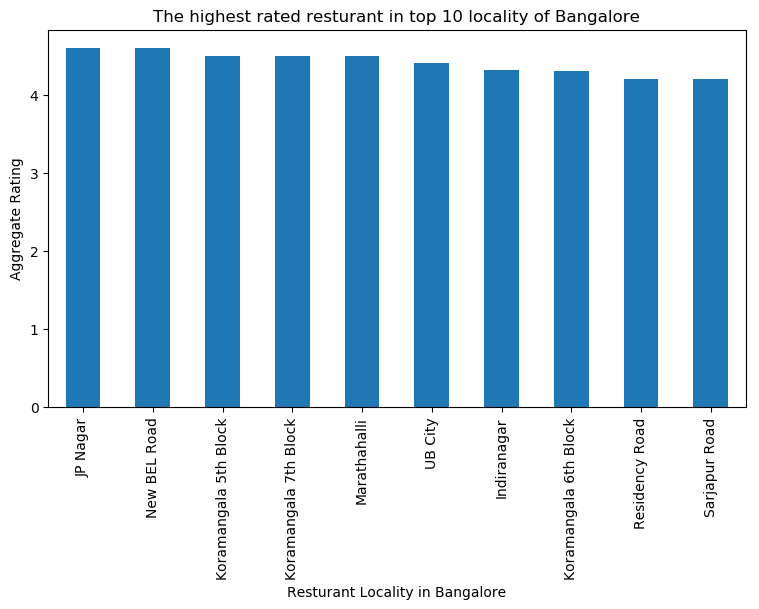

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of Bangalore')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Bangalore')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

###### The best restarants are available in JP Nagar and New BEL Road.



## what places are have worst restaurants in Bangalore?


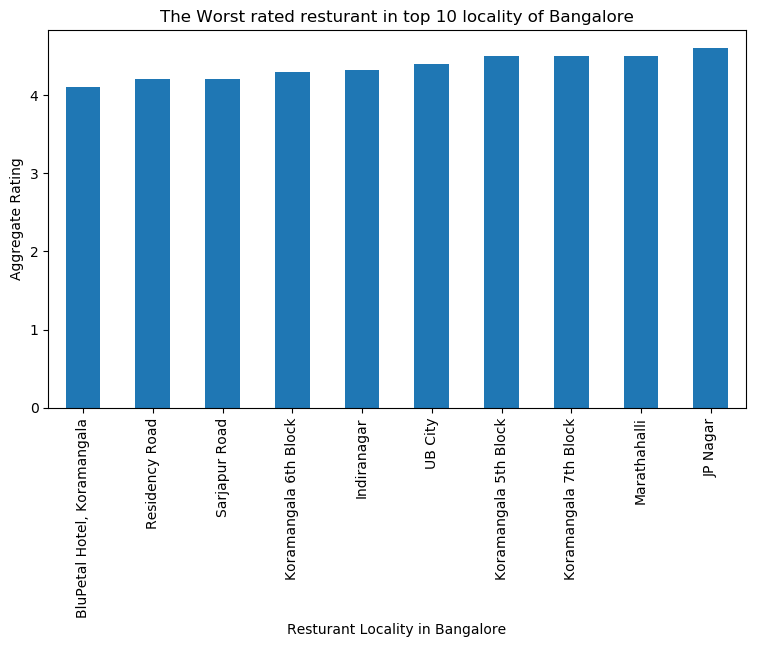

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of Bangalore')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Bangalore')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

###### The worst restarants are available in BluePetal Hotel, Koramangala.

## Which place are suitable for edible person in Bangalore city?

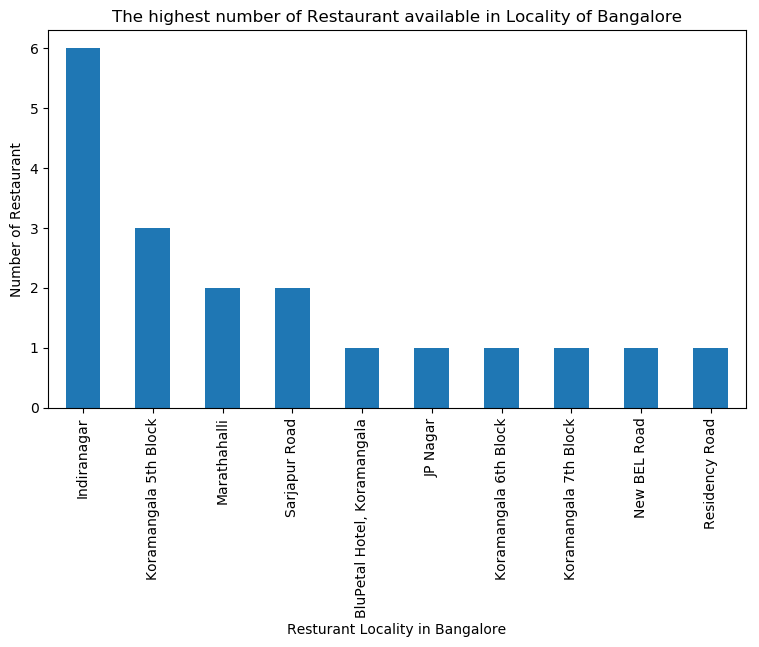

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of Bangalore')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Bangalore')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

###### Indiranagar is the best places for edible person to stay there.

## Which place are not suitable for edible person in Bangalore city?

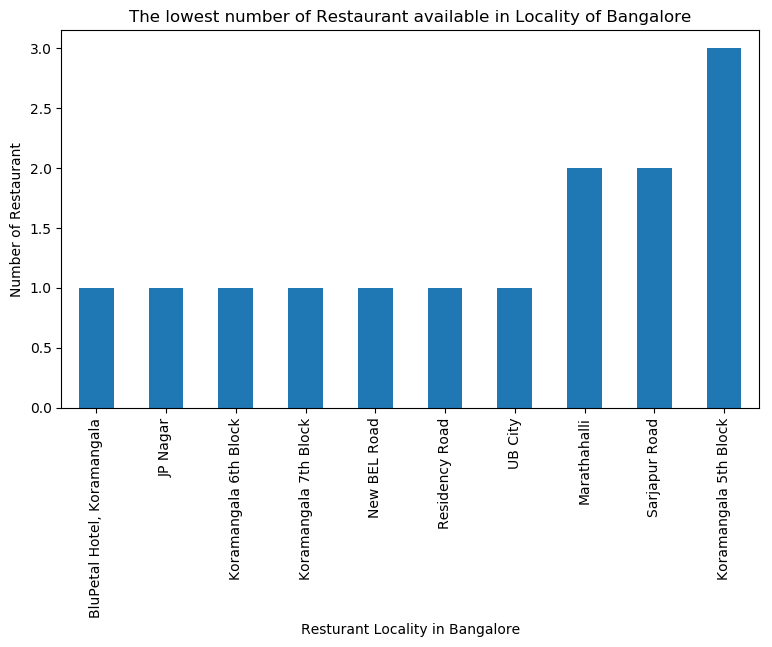

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of Bangalore')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Bangalore')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

###### BluePetal Hotel, Koramangala, JP Nagar, Koramangala 6th Block, Koramangala 7th Block, New BEL Road, Residency Road and UB City are the locality which is not suitable for edible person in Bangalore city

## What are the best places for continental restaurant in Bangalore city

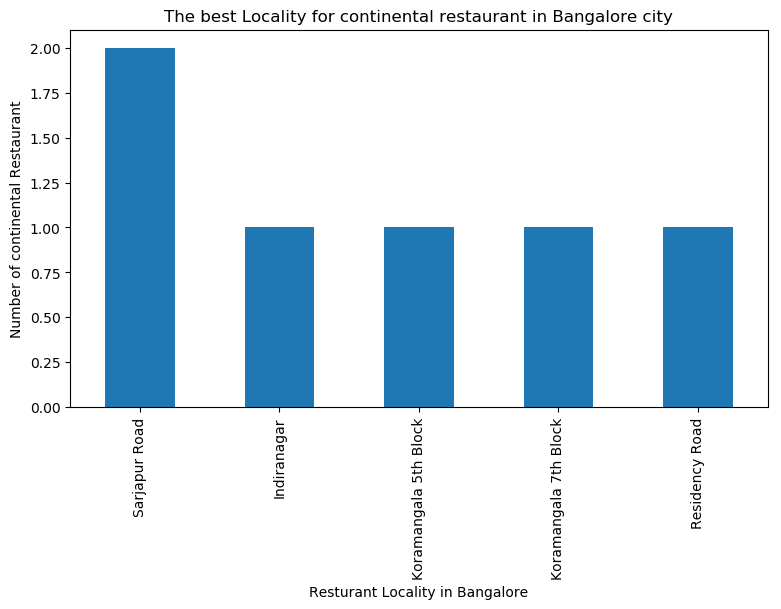

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for continental restaurant in Bangalore city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.contains('Continental')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in Bangalore')
#On y-axis
plt.ylabel('Number of continental Restaurant')

#displays the plot
plt.show()

###### Sarijapur Road is the best place for Continental restaurant.

## which places are the best continental resturants in Bangalore?

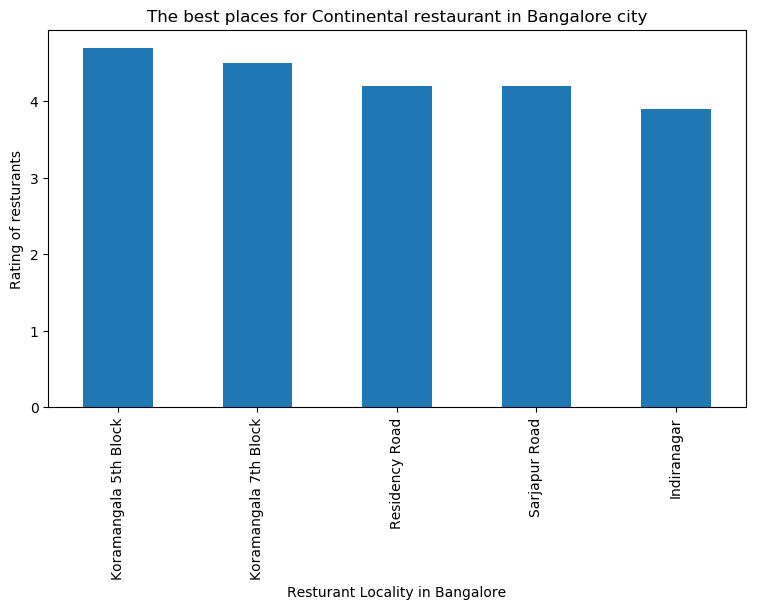

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Continental restaurant in Bangalore city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.contains('Continental')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in Bangalore')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

###### Koramangala 5th Block is best Continental resturants.

## Data transformation

##### Based on Locality grouping the data

In [19]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [20]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes
0,"BluPetal Hotel, Koramangala",12.933284,77.615428,1,"North Indian, Mughlai",4.100000,Very Good,2416
1,Indiranagar,12.976278,77.642775,6,"Asian, Italian, American, Pizza, European, Con...",4.316667,"Excellent, Good, Very Good",19834
2,JP Nagar,12.906229,77.596791,1,"Pizza, Cafe, Italian",4.600000,Excellent,781
3,Koramangala 5th Block,12.933947,77.615415,3,"Continental, American, Italian, North Indian, ...",4.500000,"Excellent, Very Good",15328
4,Koramangala 6th Block,12.939496,77.625999,1,"North Indian, Chinese, Italian, Street Food, D...",4.300000,Very Good,753


In [21]:
df_final.shape

(11, 8)

In [22]:
## Define Foursquare Credentials and Version
CLIENT_ID = 'ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ' # Foursquare ID
CLIENT_SECRET = 'H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ
CLIENT_SECRET:H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW


### create a function to repeat the same process to all the Locality in Bangalore

In [23]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### find the venues in all Bangalore Locality

In [24]:
Bangalore_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

BluPetal Hotel, Koramangala
Indiranagar
JP Nagar
Koramangala 5th Block
Koramangala 6th Block
Koramangala 7th Block
Marathahalli
New BEL Road
Residency Road
Sarjapur Road
UB City


In [25]:
Bangalore_venues.head()

,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"BluPetal Hotel, Koramangala",12.933284,77.615428,Truffles Ice & Spice,12.933443,77.614265,Burger Joint
1,"BluPetal Hotel, Koramangala",12.933284,77.615428,Gilly's Rest-O-Bar,12.932987,77.614755,Bar
2,"BluPetal Hotel, Koramangala",12.933284,77.615428,XOOX Brewmill,12.935507,77.614982,Brewery
3,"BluPetal Hotel, Koramangala",12.933284,77.615428,Khawa Karpo,12.934051,77.616640,Chinese Restaurant
4,"BluPetal Hotel, Koramangala",12.933284,77.615428,Stoner,12.932759,77.614132,Ice Cream Shop


In [27]:
Bangalore_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
"BluPetal Hotel, Koramangala",100,100,100,100,100,100
Indiranagar,59,59,59,59,59,59
JP Nagar,29,29,29,29,29,29
Koramangala 5th Block,100,100,100,100,100,100
Koramangala 6th Block,24,24,24,24,24,24
Koramangala 7th Block,82,82,82,82,82,82
Marathahalli,5,5,5,5,5,5
New BEL Road,34,34,34,34,34,34
Residency Road,100,100,100,100,100,100


In [28]:
print('There are {} uniques categories.'.format(len(Bangalore_venues['Venue Category'].unique())))

There are 109 uniques categories.


In [29]:
Bangalore_onehot = pd.get_dummies(Bangalore_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
Bangalore_onehot['Locality'] = Bangalore_venues['Locality'] 

# move Locality column to the first column
column_list = Bangalore_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
Bangalore_onehot = Bangalore_onehot[column_list]

Bangalore_onehot.head()

,Locality,Afghan Restaurant,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Bakery,Bar,...,Steakhouse,Tea Room,Tennis Stadium,Thai Restaurant,Tibetan Restaurant,Toy / Game Store,Track Stadium,Trail,Udupi Restaurant,Vegetarian / Vegan Restaurant
0,"BluPetal Hotel, Koramangala",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"BluPetal Hotel, Koramangala",0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,"BluPetal Hotel, Koramangala",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"BluPetal Hotel, Koramangala",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"BluPetal Hotel, Koramangala",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
Bangalore_grouped = Bangalore_onehot.groupby('Locality').mean().reset_index()
Bangalore_grouped

,Locality,Afghan Restaurant,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Bakery,Bar,...,Steakhouse,Tea Room,Tennis Stadium,Thai Restaurant,Tibetan Restaurant,Toy / Game Store,Track Stadium,Trail,Udupi Restaurant,Vegetarian / Vegan Restaurant
0,"BluPetal Hotel, Koramangala",0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.020000,0.020000,0.030000,...,0.000000,0.010000,0.000000,0.00,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Indiranagar,0.000000,0.00,0.00,0.016949,0.000000,0.000000,0.000000,0.033898,0.033898,...,0.016949,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.016949,0.016949
2,JP Nagar,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.068966,0.068966,...,0.000000,0.000000,0.000000,0.00,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000
3,Koramangala 5th Block,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.020000,0.010000,0.030000,...,0.000000,0.010000,0.000000,0.00,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Koramangala 6th Block,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.041667,0.000000,0.00,0.000000,0.041667,0.000000,0.000000,0.000000,0.041667
5,Koramangala 7th Block,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.012195,0.024390,0.024390,...,0.000000,0.012195,0.000000,0.00,0.012195,0.000000,0.000000,0.000000,0.000000,0.000000
6,Marathahalli,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,New BEL Road,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.029412,0.000000,0.029412,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000
8,Residency Road,0.000000,0.01,0.01,0.000000,0.000000,0.010000,0.000000,0.010000,0.060000,...,0.010000,0.000000,0.000000,0.01,0.010000,0.000000,0.000000,0.000000,0.000000,0.010000
9,Sarjapur Road,0.055556,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [31]:
Bangalore_grouped.shape

(11, 110)

In [32]:
num_top_venues = 5

for hood in Bangalore_grouped['Locality']:
    print("----"+hood+"----")
    temp = Bangalore_grouped[Bangalore_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----BluPetal Hotel, Koramangala----
                  venue  freq
0     Indian Restaurant  0.18
1  Fast Food Restaurant  0.05
2    Chinese Restaurant  0.05
3                  Café  0.05
4          Dessert Shop  0.04


----Indiranagar----
                venue  freq
0                Café  0.14
1   Indian Restaurant  0.14
2                 Pub  0.07
3              Lounge  0.05
4  Chinese Restaurant  0.05


----JP Nagar----
               venue  freq
0        Pizza Place  0.07
1  Indian Restaurant  0.07
2             Bakery  0.07
3                Bar  0.07
4        Coffee Shop  0.07


----Koramangala 5th Block----
                venue  freq
0   Indian Restaurant  0.19
1                Café  0.05
2  Chinese Restaurant  0.05
3          Restaurant  0.04
4              Lounge  0.04


----Koramangala 6th Block----
                           venue  freq
0                    Pizza Place  0.08
1                 Clothing Store  0.08
2             Seafood Restaurant  0.08
3                        

In [33]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [34]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = Bangalore_grouped['Locality']

for ind in np.arange(Bangalore_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Bangalore_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"BluPetal Hotel, Koramangala",Indian Restaurant,Café,Fast Food Restaurant,Chinese Restaurant,Lounge,Dessert Shop,Restaurant,Bookstore,Bar,Snack Place
1,Indiranagar,Café,Indian Restaurant,Pub,Pizza Place,Chinese Restaurant,Lounge,Dessert Shop,Bakery,Bar,Boutique
2,JP Nagar,Indian Restaurant,Coffee Shop,Café,Pizza Place,Bakery,Bar,Shopping Mall,Multiplex,Clothing Store,Department Store
3,Koramangala 5th Block,Indian Restaurant,Café,Chinese Restaurant,Fast Food Restaurant,Lounge,Dessert Shop,Restaurant,Bookstore,Bar,Donut Shop
4,Koramangala 6th Block,Clothing Store,Café,Pizza Place,Seafood Restaurant,Vegetarian / Vegan Restaurant,Bengali Restaurant,Gym / Fitness Center,Food Court,Ice Cream Shop,Indian Restaurant
5,Koramangala 7th Block,Indian Restaurant,Dessert Shop,Fast Food Restaurant,Bookstore,Lounge,Café,Chinese Restaurant,Shopping Mall,Bar,Snack Place
6,Marathahalli,Indian Restaurant,Chinese Restaurant,Café,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop
7,New BEL Road,Ice Cream Shop,Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,Pizza Place,Coffee Shop,German Restaurant,Mexican Restaurant,Burger Joint,Sandwich Place
8,Residency Road,Café,Indian Restaurant,Pub,Bar,Lounge,Coffee Shop,Chinese Restaurant,Bookstore,Clothing Store,Pizza Place
9,Sarjapur Road,Indian Restaurant,Café,Brewery,Afghan Restaurant,South Indian Restaurant,Coffee Shop,Grocery Store,Pizza Place,Pub,Restaurant


In [35]:
kclusters = 5

Bangalore_clustering = Bangalore_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Bangalore_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(11,)

In [41]:

# add clustering labels
Bangalore_merged = df_final.head(240)
Bangalore_merged['Cluster Labels'] = kmeans.labels_


Bangalore_merged = Bangalore_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

Bangalore_merged.head()

C:\Users\saran\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"BluPetal Hotel, Koramangala",12.933284,77.615428,1,"North Indian, Mughlai",4.100000,Very Good,2416,0,Indian Restaurant,Café,Fast Food Restaurant,Chinese Restaurant,Lounge,Dessert Shop,Restaurant,Bookstore,Bar,Snack Place
1,Indiranagar,12.976278,77.642775,6,"Asian, Italian, American, Pizza, European, Con...",4.316667,"Excellent, Good, Very Good",19834,0,Café,Indian Restaurant,Pub,Pizza Place,Chinese Restaurant,Lounge,Dessert Shop,Bakery,Bar,Boutique
2,JP Nagar,12.906229,77.596791,1,"Pizza, Cafe, Italian",4.600000,Excellent,781,0,Indian Restaurant,Coffee Shop,Café,Pizza Place,Bakery,Bar,Shopping Mall,Multiplex,Clothing Store,Department Store
3,Koramangala 5th Block,12.933947,77.615415,3,"Continental, American, Italian, North Indian, ...",4.500000,"Excellent, Very Good",15328,0,Indian Restaurant,Café,Chinese Restaurant,Fast Food Restaurant,Lounge,Dessert Shop,Restaurant,Bookstore,Bar,Donut Shop
4,Koramangala 6th Block,12.939496,77.625999,1,"North Indian, Chinese, Italian, Street Food, D...",4.300000,Very Good,753,3,Clothing Store,Café,Pizza Place,Seafood Restaurant,Vegetarian / Vegan Restaurant,Bengali Restaurant,Gym / Fitness Center,Food Court,Ice Cream Shop,Indian Restaurant


In [43]:

# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Bangalore_merged['Lat'], Bangalore_merged['Lng'], Bangalore_merged['Locality'], Bangalore_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [45]:
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 0, Bangalore_merged.columns[[1] + list(range(5, Bangalore_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,12.933284,4.100000,Very Good,2416,0,Indian Restaurant,Café,Fast Food Restaurant,Chinese Restaurant,Lounge,Dessert Shop,Restaurant,Bookstore,Bar,Snack Place
1,12.976278,4.316667,"Excellent, Good, Very Good",19834,0,Café,Indian Restaurant,Pub,Pizza Place,Chinese Restaurant,Lounge,Dessert Shop,Bakery,Bar,Boutique
2,12.906229,4.600000,Excellent,781,0,Indian Restaurant,Coffee Shop,Café,Pizza Place,Bakery,Bar,Shopping Mall,Multiplex,Clothing Store,Department Store
3,12.933947,4.500000,"Excellent, Very Good",15328,0,Indian Restaurant,Café,Chinese Restaurant,Fast Food Restaurant,Lounge,Dessert Shop,Restaurant,Bookstore,Bar,Donut Shop
5,12.935662,4.500000,Excellent,1288,0,Indian Restaurant,Dessert Shop,Fast Food Restaurant,Bookstore,Lounge,Café,Chinese Restaurant,Shopping Mall,Bar,Snack Place
8,12.972532,4.200000,Very Good,334,0,Café,Indian Restaurant,Pub,Bar,Lounge,Coffee Shop,Chinese Restaurant,Bookstore,Clothing Store,Pizza Place


In [46]:
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 1, Bangalore_merged.columns[[1] + list(range(5, Bangalore_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,12.913652,4.2,"Excellent, Good",6110,1,Indian Restaurant,Café,Brewery,Afghan Restaurant,South Indian Restaurant,Coffee Shop,Grocery Store,Pizza Place,Pub,Restaurant


In [47]:
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 2, Bangalore_merged.columns[[1] + list(range(5, Bangalore_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,12.962655,4.5,"Excellent, Very Good",7890,2,Indian Restaurant,Chinese Restaurant,Café,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop


In [48]:
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] ==3 , Bangalore_merged.columns[[1] + list(range(5, Bangalore_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,12.939496,4.3,Very Good,753,3,Clothing Store,Café,Pizza Place,Seafood Restaurant,Vegetarian / Vegan Restaurant,Bengali Restaurant,Gym / Fitness Center,Food Court,Ice Cream Shop,Indian Restaurant
10,12.972161,4.4,Very Good,754,3,Italian Restaurant,Lounge,Mexican Restaurant,Café,Restaurant,Coffee Shop,Clothing Store,Electronics Store,Hotel,Museum


In [49]:
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 4, Bangalore_merged.columns[[1] + list(range(5, Bangalore_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,13.029198,4.6,Excellent,627,4,Ice Cream Shop,Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,Pizza Place,Coffee Shop,German Restaurant,Mexican Restaurant,Burger Joint,Sandwich Place


### Conclusion
Koramangala 5th Block is best Continental resturants.
The best restarants are available in JP Nagar and New BEL Road.
Sarijapur Road is the best place for Continental restaurant.
BluePetal Hotel, Koramangala, JP Nagar, Koramangala 6th Block, Koramangala 7th Block, New BEL Road, Residency Road and UB City are the locality which is not suitable for edible person in Bangalore city

 #### Cluster 1: It is most recommended for Indian Restaurants. 
 #### Cluster 2: It is most recommended for Hotels and nightclub. 
 #### Cluster 3 and Cluster 5: It is most recommended for Fast food. 
 #### Cluster 4: It is most recommended for the cafe and pizza.